<center>

# Universidad de Costa Rica

## Facultad de Ingeniería
## Escuela de Ingeniería Eléctrica
## Bachillerato en Ingeniería Eléctrica
## IE-0247 Señales y Sistemas I
## II ciclo 2023
#
## Proyecto 1
#
## José Andrés Guerrero Álvarez – B63162
## Grupo 01

## Profesor: 
## Marvin Coto Jiménez

## 10 de setiembre del 2023

</center>


<div style="text-align: justify;">
<p>

# I. Introducción y contextualización

Los electrocardiogramas (ECG) son una herramienta esencial en el campo de la cardiología y la atención médica en general. Se utilizan para rastrear la salud de nuestro corazón, proporcionando información crucial sobre su funcionamiento. Sin embargo, la interpretación manual de estas señales, a pesar de su importancia, presenta desafíos considerables (Kachuee et al., 2018).

Detectar y clasificar las diversas formas y patrones presentes en las señales de ECG puede ser una tarea complicada para los profesionales de la salud. Esto se debe a que las señales de ECG son complejas y cambiantes, y un diagnóstico preciso a menudo requiere tiempo y experiencia (Garcia, 2016).

El problema principal radica en que la interpretación manual de estas señales no solo es propensa a errores humanos, sino que también puede ser un proceso extremadamente demorado. Esto puede resultar en retrasos en el diagnóstico y, en algunos casos, llevar a decisiones médicas menos efectivas. Es crucial tener en cuenta que las enfermedades cardiovasculares son una de las principales causas de muerte a nivel global, y la detección temprana y precisa es fundamental para mejorar los resultados de los pacientes.

Entre estas enfermedades, los ritmos cardíacos irregulares, como las arritmias, pueden ser particularmente peligrosos y difíciles de identificar (Kachuee et al., 2018).

## Retos en la interpretación manual de señales de ECG

Para abordar estos desafíos, se ha explorado el potencial de la automatización en el análisis de las señales de ECG. Una solución prometedora involucra el uso de la inteligencia artificial y el aprendizaje automático, donde una máquina es entrenada para aprender de un gran número de señales de ECG y predecir diferentes eventos cardíacos, como los infartos al miocardio (IM). Esta aproximación ha demostrado ser eficaz en estudios anteriores y tiene el potencial de mejorar significativamente la eficiencia y la precisión en el diagnóstico cardíaco (Kachuee et al., 2018).

## Aprovechamiento del aprendizaje profundo

En este contexto, se presenta un enfoque innovador que emplea el aprendizaje profundo para analizar las señales de ECG. Este enfoque permite que la máquina aprenda automáticamente a identificar patrones y características clave en las señales de ECG, lo que puede llevar a diagnósticos más rápidos y precisos en comparación con los métodos tradicionales. Además, se explora la idea de que el conocimiento adquirido por la máquina en una tarea específica, como la detección de arritmias, puede ser transferido con éxito a otras tareas relacionadas, como la predicción de IM, lo que abre nuevas perspectivas para la mejora de la atención médica y la identificación temprana de problemas cardíacos (Kachuee et al., 2018).
</p>
</div>

A continuacion se muestran realizan diferentes tareas, para esta sección (y las siguientes secciones) se adapta el código publicado por Pulido y McKiernan (2020).

# II.	Respuestas

In [5]:
# Imports python libraries
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath


In [6]:
# commands to create high-resolution figures with large labels
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

In [7]:
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()

    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))
    
    return timeECG, waveData

In [9]:
### Arreglo con el nombre de los archivos.wav
nice = ["f0001","f0002","f0003","f0004","f0005","f0006","f0007","f0008","f0009","f0010","f0011","f0012","f0013","f0014","f0015"]

En la seccion anterios lo que se hizo fue agregar el nombre de cada uno de los archivos .wav de forma que cuando el for de la siguiente seccion recorre la lista de cadenas (strings) accede a cada uno de los nombres de ellos. Ademas tambien se agrega max_amplitud y se imprime sus valores en pantalla.

In [ ]:
#Test data

for i in range(0, len(nice)): #Este for muestra los graficos de cada señal
    timeECG, waveData = ecg(nice[i]+'.wav')
    # Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(nice[i])
    plt.show()
    # Calcular la amplitud máxima
    max_amplitude = np.max(waveData)
    # Imprimir el valor máximo
    print(nice[i]+'.wav '+"Amplitud Máxima:", max_amplitude)

![Gráfico 1.  Representación de onda del archivo f0001.](f0001.png)
Gráfico 1.  Representación de onda del archivo f0001.
![Gráfico 2.  Representación de onda del archivo f0002.](f0002.png)
Gráfico 2.  Representación de onda del archivo f0002.
![Gráfico 3.  Representación de onda del archivo f0003.](f0003.png)
Gráfico 3.  Representación de onda del archivo f0003.
![Gráfico 4.  Representación de onda del archivo f0004.](f0004.png)
Gráfico 4.  Representación de onda del archivo f0004.
![Gráfico 5.  Representación de onda del archivo f0005.](f0005.png)
Gráfico 5.  Representación de onda del archivo f0005.
![Gráfico 6.  Representación de onda del archivo f0006.](f0006.png)
Gráfico 6.  Representación de onda del archivo f0006.
![Gráfico 7.  Representación de onda del archivo f0007.](f0007.png)
Gráfico 7.  Representación de onda del archivo f0007.
![Gráfico 8.  Representación de onda del archivo f0008.](f0008.png)
Gráfico 8.  Representación de onda del archivo f0008.
![Gráfico 9.  Representación de onda del archivo f0009.](f0009.png)
Gráfico 9.  Representación de onda del archivo f0009.
![Gráfico 10.  Representación de onda del archivo f0010.](f0010.png)
Gráfico 10.  Representación de onda del archivo f0010.
![Gráfico 11.  Representación de onda del archivo f0011.](f0011.png)
Gráfico 11.  Representación de onda del archivo f0011.
![Gráfico 12.  Representación de onda del archivo f0012.](f0012.png)
Gráfico 12.  Representación de onda del archivo f0012.
![Gráfico 13.  Representación de onda del archivo f0013.](f0013.png)
Gráfico 13.  Representación de onda del archivo f0013.
![Gráfico 14.  Representación de onda del archivo f0014.](f0014.png)
Gráfico 14.  Representación de onda del archivo f0014.
![Gráfico 15.  Representación de onda del archivo f0015.](f0015.png)
Gráfico 15.  Representación de onda del archivo f0015.

<div style="text-align: justify;">
<p>

## a. ¿Cuál es la mayor amplitud presente en los datos?

Como se puede observar en la figura 1 parte b, se creó una variable llamada `max_amplitud` que contiene la amplitud máxima de cada onda, extraída mediante la función `np.max(waveData)`. Esto equivale a la amplitud máxima de cada archivo. Gracias a esto, se puede determinar que la f0005.wav es la que tiene la mayor amplitud (32767 μV).

## b. ¿Cuál sería el resultado sonoro de las siguientes operaciones sobre las señales: escalamiento, desplazamiento, reflexión?

### a. Escalamiento:
- El escalamiento de una señal se produce al multiplicar todos sus valores por un factor constante. Si la constante es mayor que 1, la señal se amplifica; si es menor que 1 y mayor que 0, la señal se atenúa (valores más pequeños). Al aumentar o disminuir la amplitud de una señal, se produce el efecto sonoro de subir o bajar el volumen, sin alterar su forma básica.

### b. Desplazamiento:
- En este caso, se puede hablar de desplazamiento (o retraso) hacia la derecha (positivo) o hacia la izquierda (negativo). Estos desplazamientos se logran al sumar o restar (respectivamente) un valor positivo al dominio temporal de la señal. Esto provoca un cambio de posición de la señal a lo largo del tiempo sin afectar su forma o amplitud. Un ejemplo de uso podría ser tratar de sincronizar 2 señales.

### c. Reflexión:
- La reflexión de una señal implica cambiar el signo de todos los valores. Si la señal es positiva en el eje del tiempo (horizontal) y se realiza la reflexión, esta será negativa y viceversa. El efecto sonoro es que la señal se reproduce en la dirección opuesta en el eje horizontal.
</p>
</div>


En las siguintes tres secciones se muestra:
- Código para realizar un gráfico que contenga solo un latido del archivo f0001.wav 

In [ ]:
# Plotting EMG signal (one beat)
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(1.4,1.8)
plt.title("One beat")
plt.show()

![Gráfico 16.  Un solo latido del archivo f0001.wav.](one_beat.png)
Gráfico 16.  Un solo latido del archivo f0001.wav.

- Código para realizar un gráfico que contenga tres latidos del archivo f0001.wav 

In [ ]:
# Plotting EMG signal (three beats)
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(1.4,2.6)
plt.title("Three beats")
plt.show()

![Gráfico 17.  Un solo latido del archivo f0001.wav.](three_beat.png)
Gráfico 17.  Tres latidos del archivo f0001.wav.

- Código para realizar un gráfico que contenga 15 segundos del archivo f0001.wav.

In [ ]:
# Plotting EMG signal (15 seconds)
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0,15)
plt.title("15 seconds")
plt.show()

![Gráfico 18. 15 segundos del archivo f0001.wav.](15_seconds.png)
Gráfico 18. 15 segundos del archivo f0001.wav.

<div style="text-align: justify;">
<p>

### Estimación manual de la frencuncia cardiaca para el archivo f0001.wav

Del grafico 3 podemos calcular la frecuencia de pulso, al contar cada latido en los primeros 15 segundos, 40 latidos, y luego multiplicarlo por cuatro, vendrían siendo 160 latidos por minuto.

</p>
</div>

<div style="text-align: justify;">
<p>

# Algoritmo para detectar componente R de un ECG:

La premisa fundamental de este algoritmo es obtener un registro de ECG de calidad óptima. A continuación, se busca identificar los picos máximos (puntos R) en una ventana de tiempo específica basada en un umbral determinado (Pulido y McKiernan, 2020).

## Detección de Picos R:

Para la detección de los picos R, se genera una matriz de valores que superan un umbral predeterminado. A continuación, se determina el valor máximo de esta matriz y se agrega al vector R. Este proceso se repite a lo largo de toda la serie temporal (Pulido y McKiernan, 2020).

A continuación, se define una función que busca los máximos locales y los retorna en un arreglo.

Sin embargo, surge una complicación: automatizar esta función para detectar todos los máximos no es sencillo, ya que depende del parámetro threshold_ratio. Para determinar el valor óptimo, es necesario examinar gráficamente y ajustar este umbral para cada conjunto de datos.

Si no se detectan todas las crestas R, es necesario disminuir el threshold_ratio. En cambio, si se detectan componentes que no son crestas R (como ondas T), se debe incrementar el threshold_ratio.

Por lo tanto, para determinar los máximos locales, es crucial analizar gráficamente cada caso. Sin este análisis, las frecuencias cardiacas, ya sea por picos R o por intervalos R-R, no se aproximarán a la realidad, como se verá más adelante.

La siguiente función es muy relevante en el análisis de ECG, los maximos locales corresponden a los picos u ondas R que ademas corresponden a la contracción del ventrículo en el corazón. A partir de estos picos, se calcula la frecuencia cardíaca.

</p>
</div>

In [10]:
###Función para detectar maximos locales
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):

    #Si no se detectan todas las crestas R, disminuya el threshold_ratio.
    #Si se detectan componentes que no son crestas R (como ondas T), incremente el threshold_ratio.

    if len(timeECG) != len(waveData): #Genera un error si dos arreglos tienen longitudes diferentes
        raise Exception("The two arrays have different lengths.")
    
    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False
    
    for i in range(0, len(waveData)):
            
        if waveData[i] >= threshold:#Si se supera un valor umbral,
            # los índices y valores se guardan
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])
            
        elif banner == True and waveData[i] < threshold: #Si se cruza el valor del umbral
            #se guarda el índice del valor máximo en el array original
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False     

    return mxs_indices

<div style="text-align: justify;">
<p>
La siguiente funcion detecta los intervalos R-R, se agrego un  if para tomar en cuenta los casos en que el lengt es 1 o menor, ya que pueden suceder errores como division entre 0, si resulta que length menor que 1 se devuelve un arreglo vacio que representa mejor la situación en la que no se pueden calcular intervalos R-R debido a la falta de datos.
</p>
</div>

In [16]:
###Función para detectar intervalos R
def R_intervals(time_indices):
    length = len(time_indices)
    if length > 1 : #### Se crea un if para tomar en cuenta los casos en que el lengt es 1 o menor, ya que pueden suceder errores como division entre 0
        intervals = np.zeros(length-1)
        for i in range(0, length-1):
            intervals[i] = time_indices[i+1]-time_indices[i]
    else: ### si es menor que 1 se devuelve un arreglo vacio que representa mejor la situación en la que no se pueden calcular intervalos R-R debido a la falta de datos
        intervals = []
    return intervals

In [12]:
### Arreglo con el nombre de los nuevos archivos.wav
nice = ["a0001","a0002","a0003","a0004","a0005","a0006","a0007","a0008","a0009","a0010","a0011","a0012","a0013","a0014","a0015"]

<div style="text-align: justify;">
<p>
Ya por último en la siguiente seccion lo que se hizo fue armar un for para ir iterando en los archivos de la lista nice, esto con el fin de ir creando las grafiacas de los nuevos archivos (acá se cambió de archivos debido a que los archivos f que escogimos no era una buena opción ya que no se podian leer muy bien los intervalos R-R ni los picos R, por tanto se decide escoger los archivos a), los cuales tienen resultados de frecuencia cardiaca por intervalos R-R y por picos R muy variados, esto debido a lo que se explico anteriormente (problemas con la escogencia de threshold_ratio). Ademas se agrego dentro del for las variables necesarias para calcular la frecuencia cardiaca por intervalos R-R (formula que tambien fue agregada).

### Se advierte ademas que pueden suceder ciertos problemas dentro del siguiente for debido a los tipos de señales que ingresen:
#### La advertencia "overflow encountered in scalar subtract": 
Significa que se ha encontrado un desbordamiento (overflow) durante una resta escalar. Esto suele ocurrir cuando los valores son muy grandes o muy pequeños para ser representados con precisión por el tipo de datos utilizado.

#### La advertencia "Mean of empty slice" 
Indica que se ha intentado calcular la media de un conjunto de datos vacío o sin valores válidos.
#### La advertencia "invalid value encountered in scalar divide" 
Indica que se ha intentado realizar una división por un valor que no es válido (por ejemplo, dividir por cero).
</p>
</div>

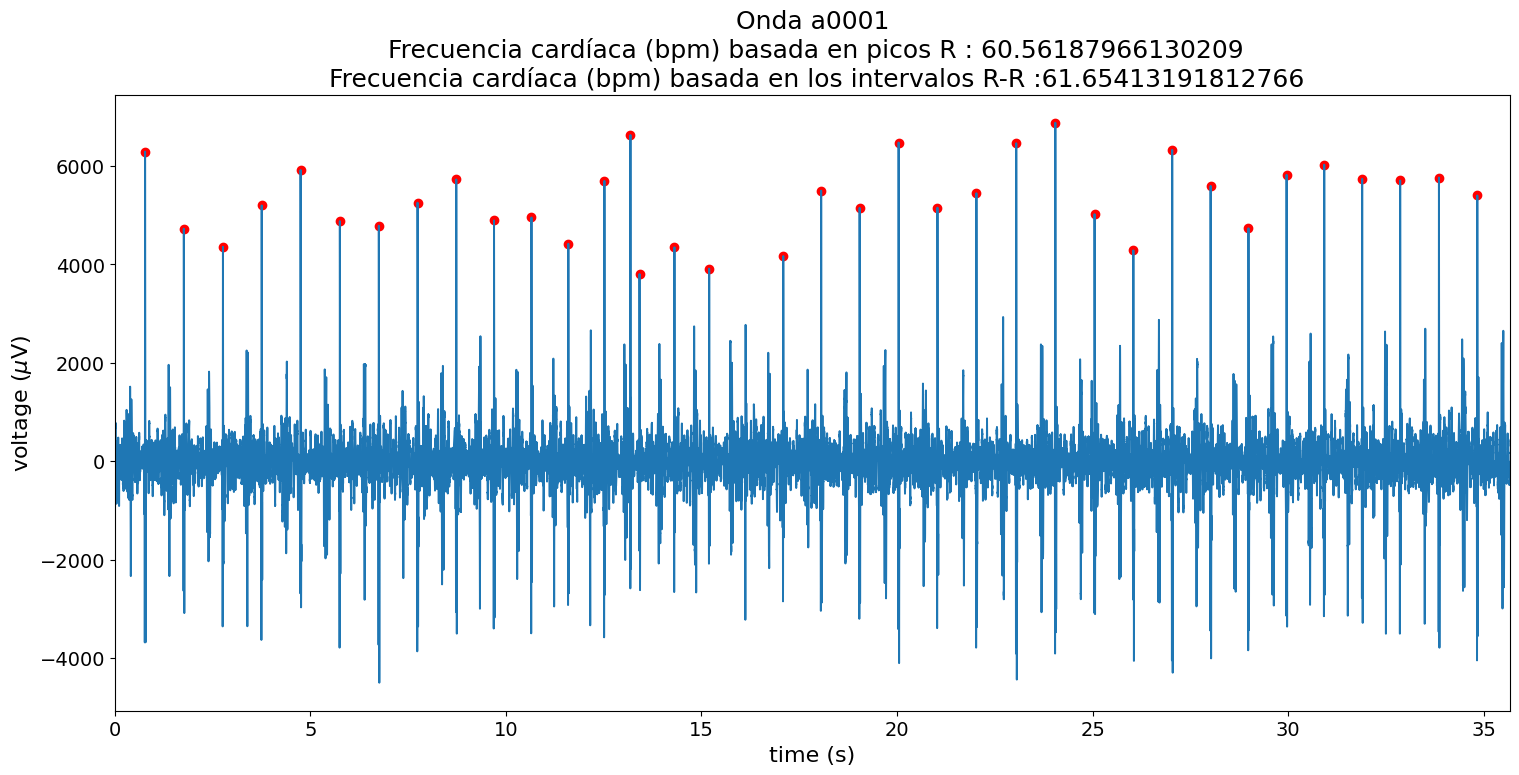

Onda a0001
 Frecuencia cardíaca (bpm) basada en picos R : 60.56187966130209
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :61.65413191812766


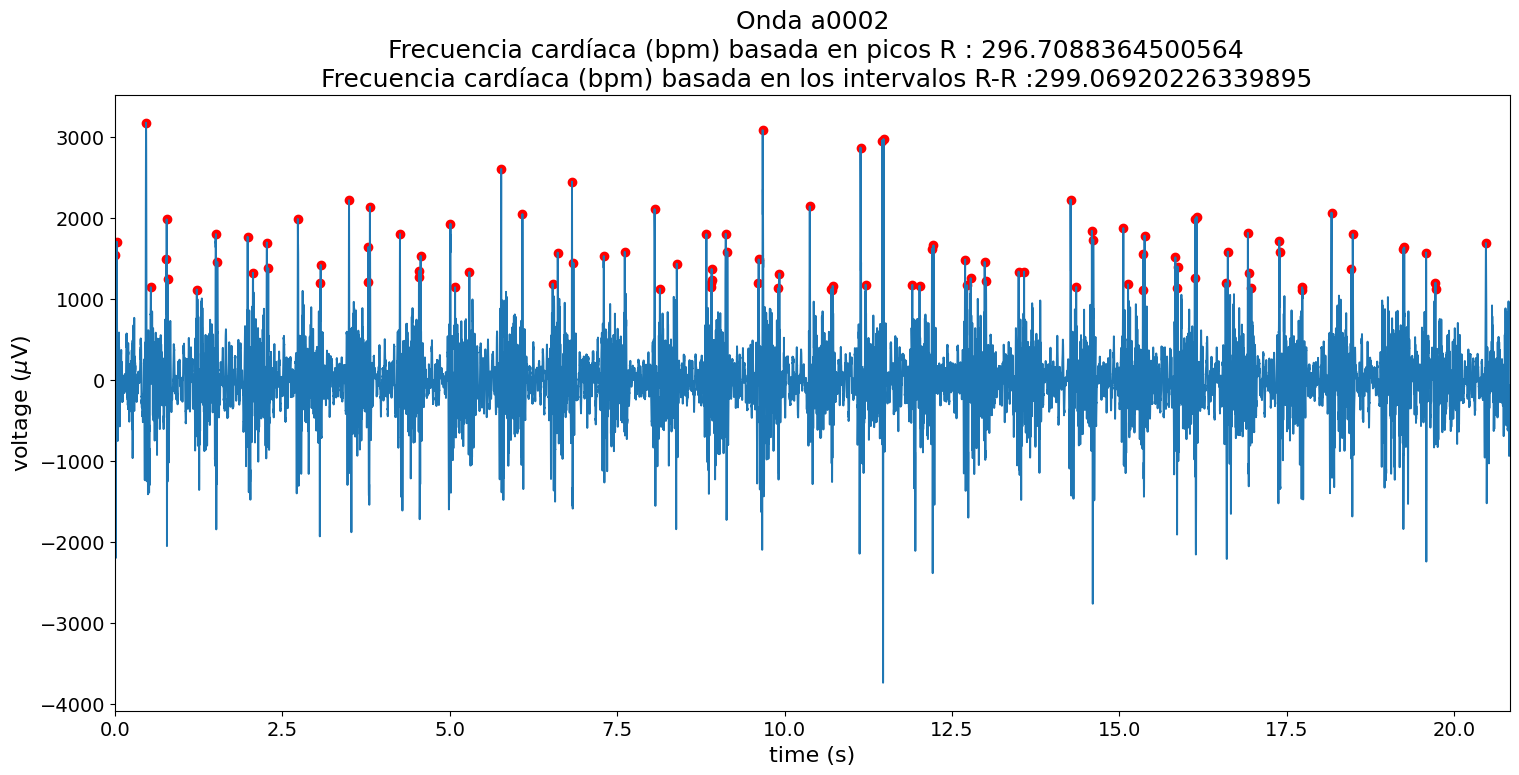

Onda a0002
 Frecuencia cardíaca (bpm) basada en picos R : 296.7088364500564
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :299.06920226339895


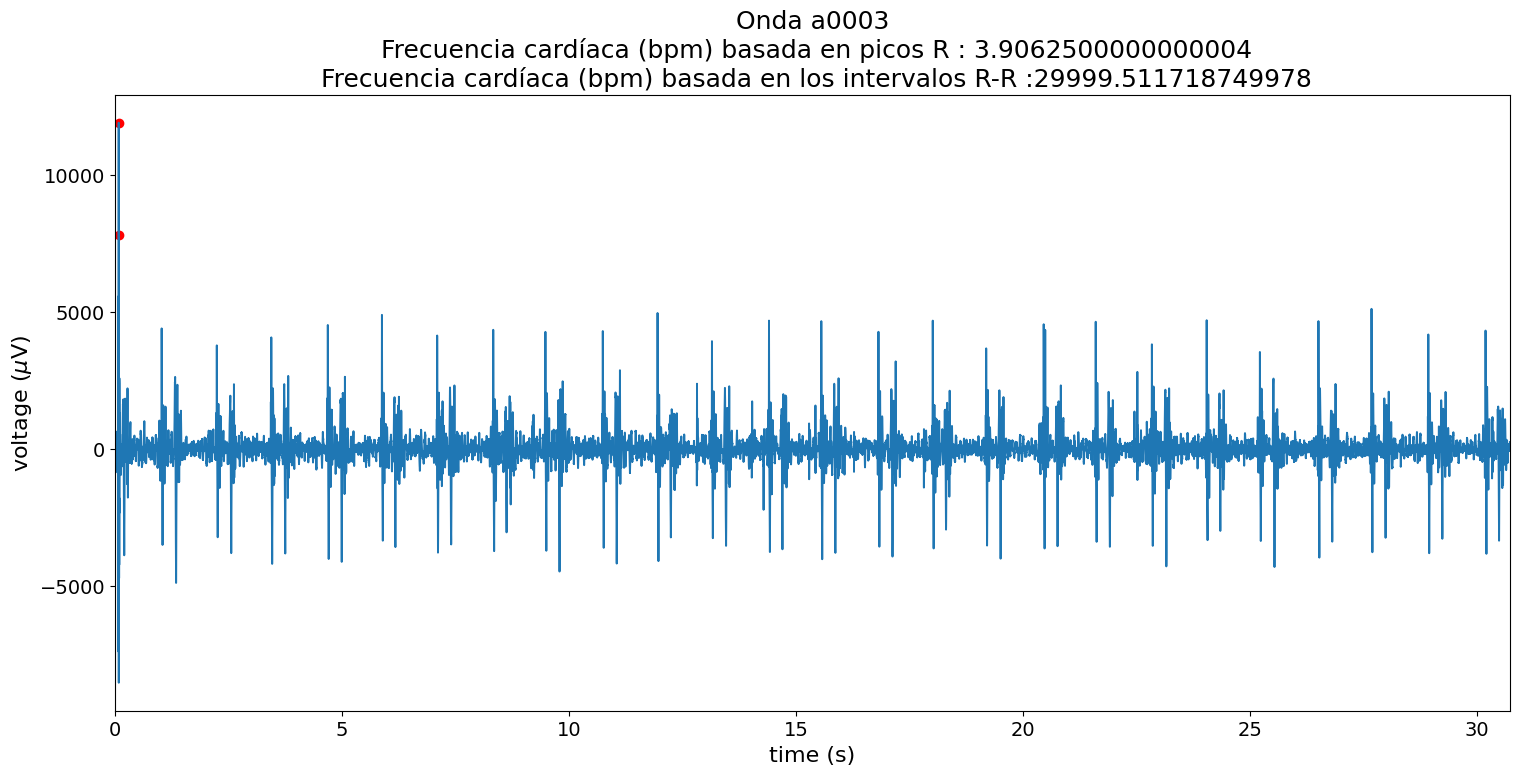

Onda a0003
 Frecuencia cardíaca (bpm) basada en picos R : 3.9062500000000004
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :29999.511718749978


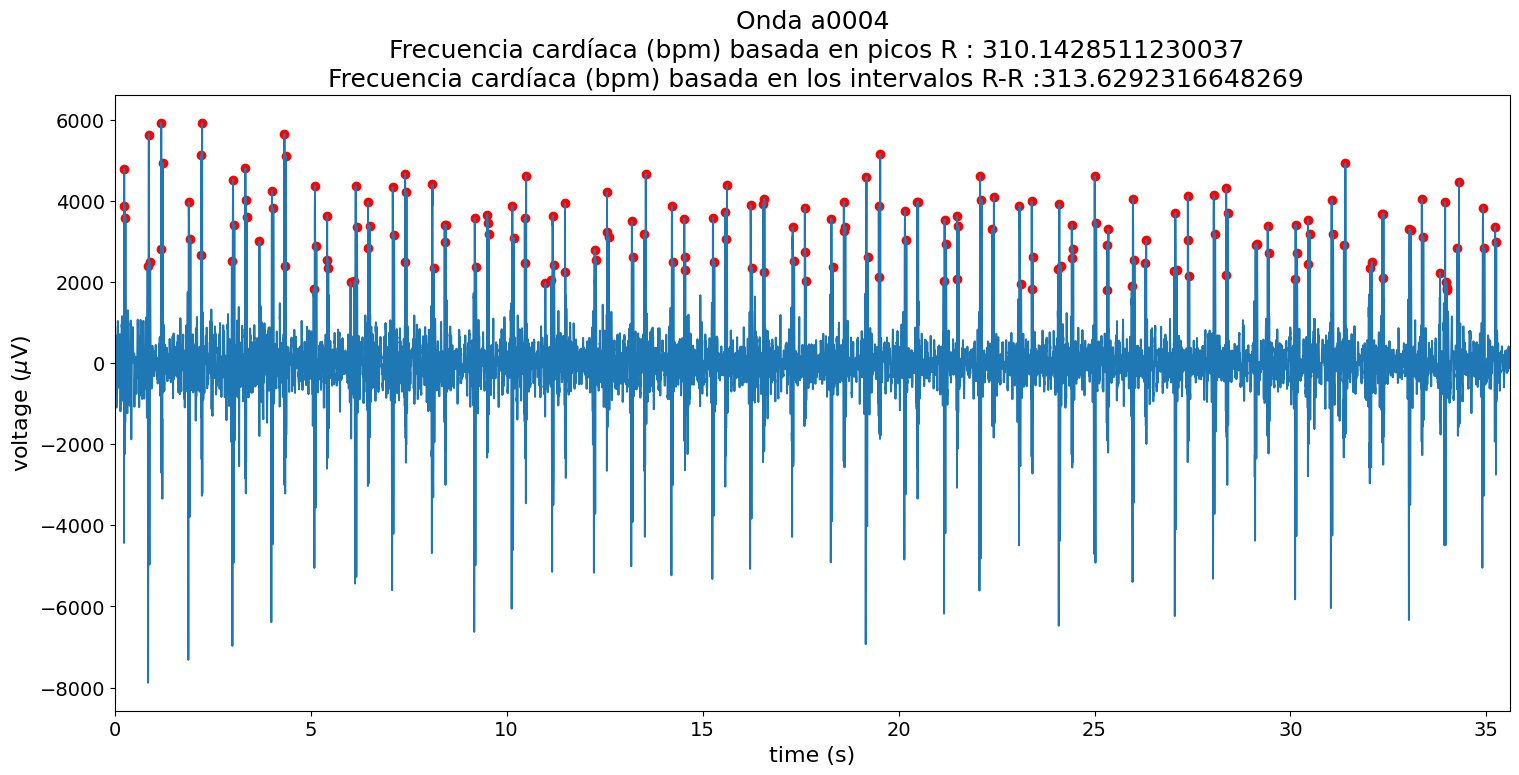

Onda a0004
 Frecuencia cardíaca (bpm) basada en picos R : 310.1428511230037
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :313.6292316648269


C:\Users\Andres\AppData\Local\Temp\ipykernel_9884\3623348221.py:10: RuntimeWarning: overflow encountered in scalar subtract
  interval = max(waveData) - min(waveData)


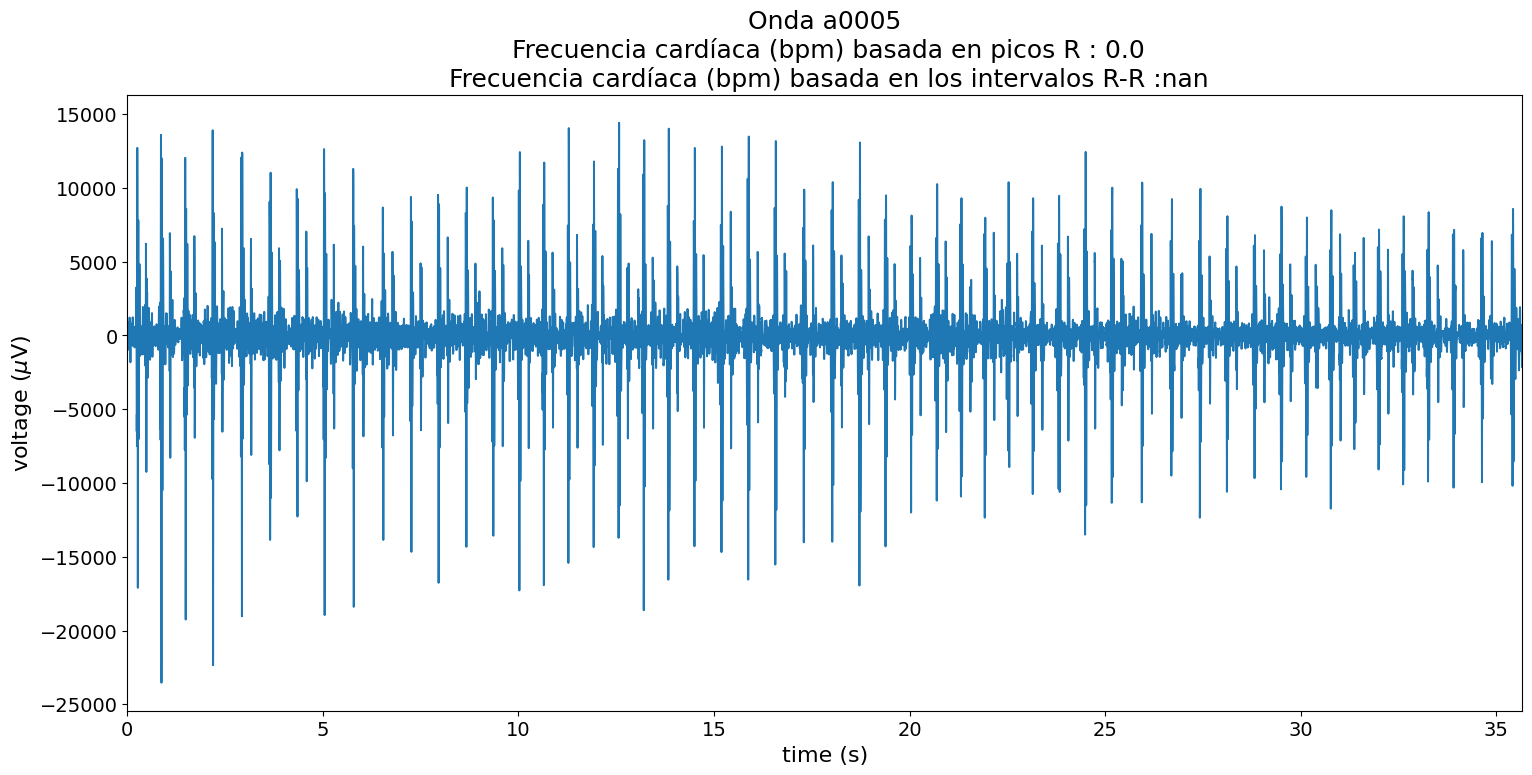

Onda a0005
 Frecuencia cardíaca (bpm) basada en picos R : 0.0
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :nan


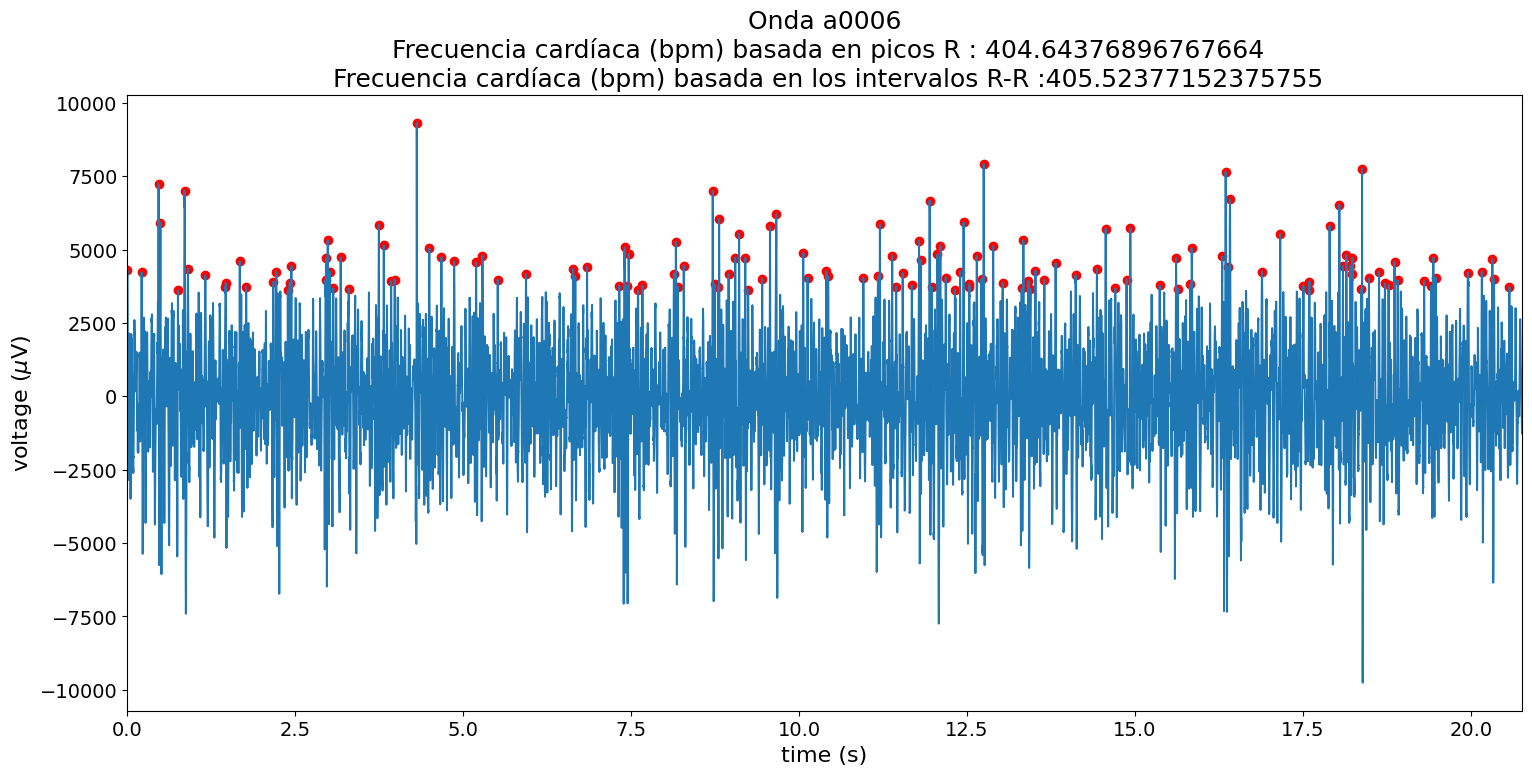

Onda a0006
 Frecuencia cardíaca (bpm) basada en picos R : 404.64376896767664
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :405.52377152375755


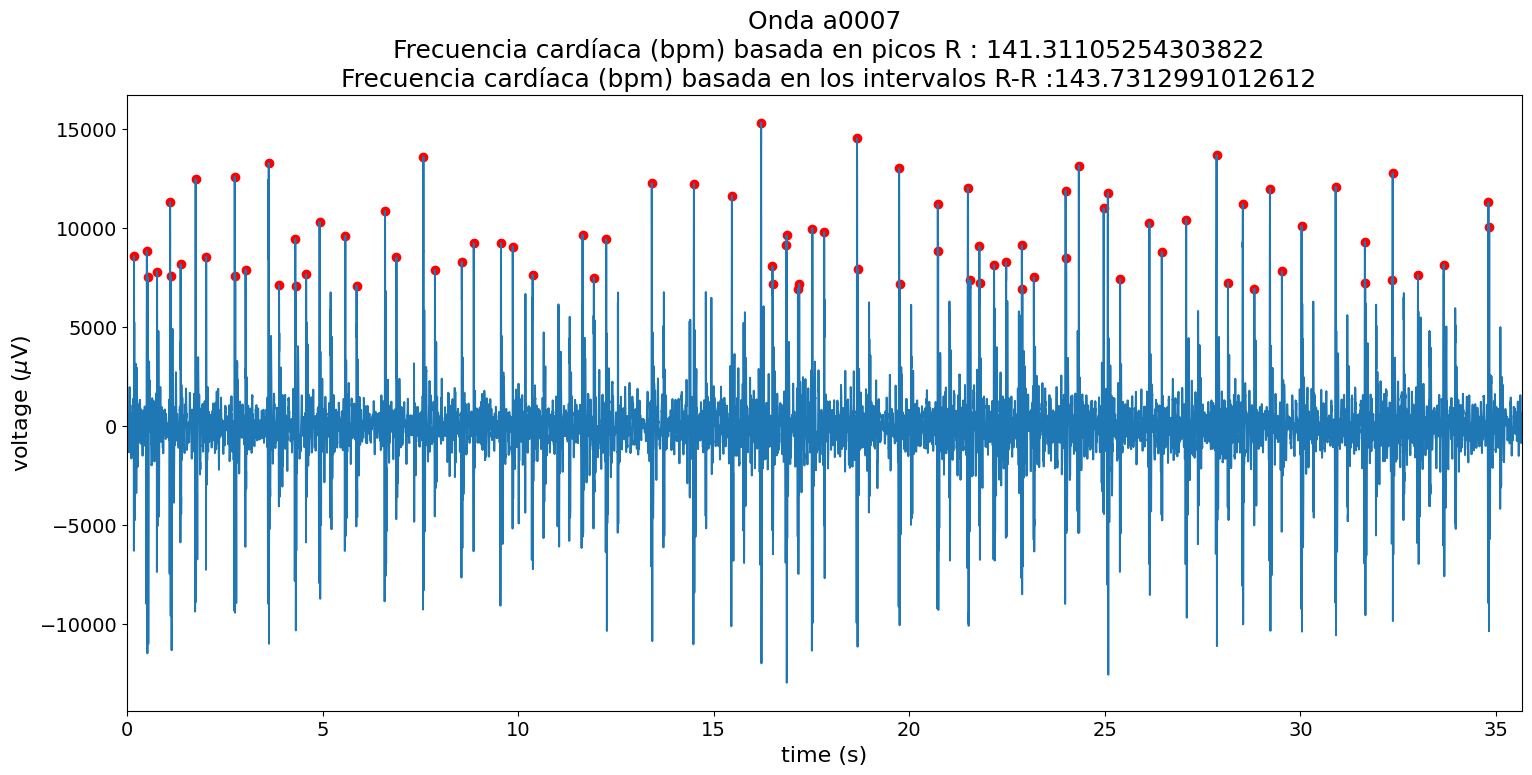

Onda a0007
 Frecuencia cardíaca (bpm) basada en picos R : 141.31105254303822
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :143.7312991012612


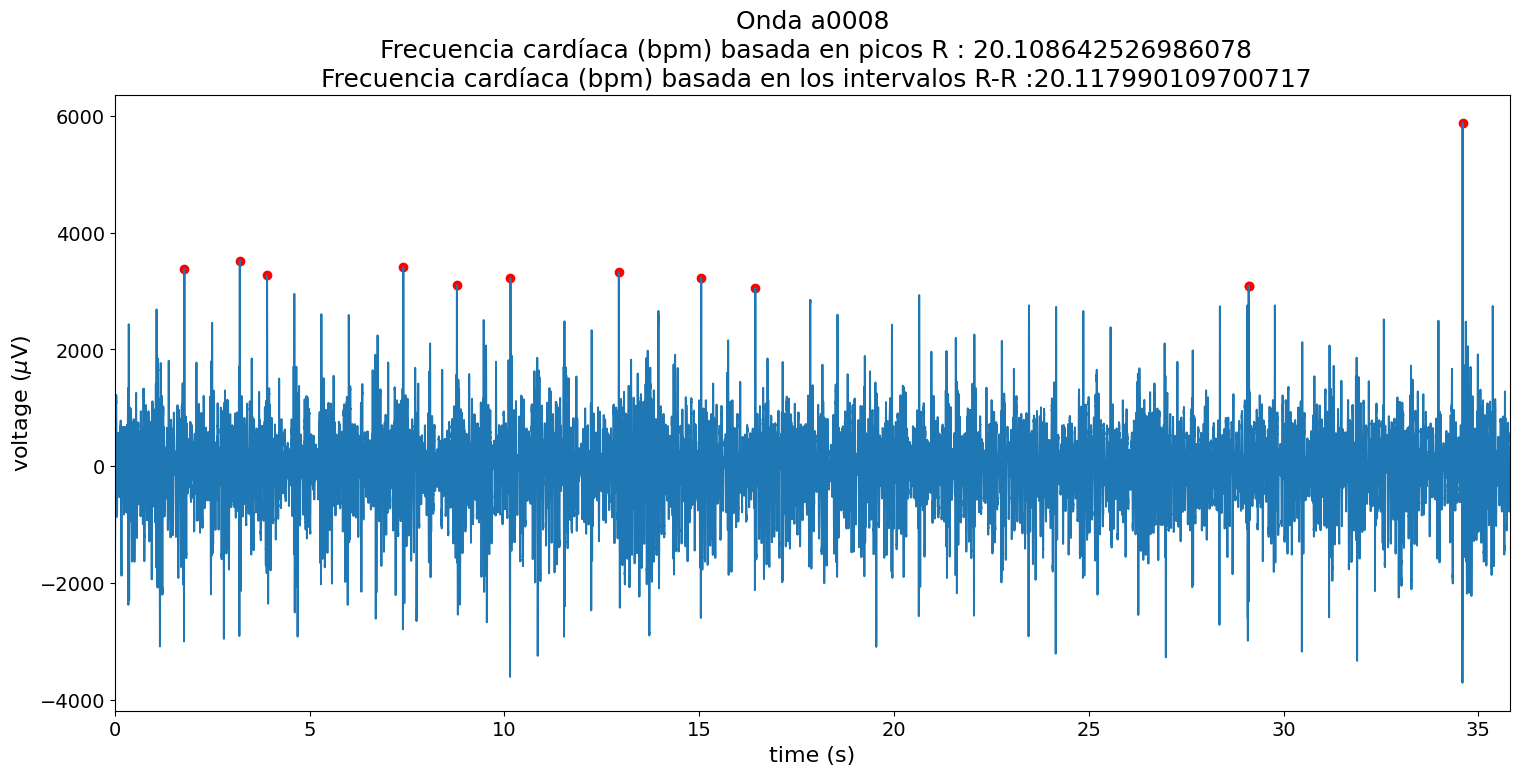

Onda a0008
 Frecuencia cardíaca (bpm) basada en picos R : 20.108642526986078
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :20.117990109700717


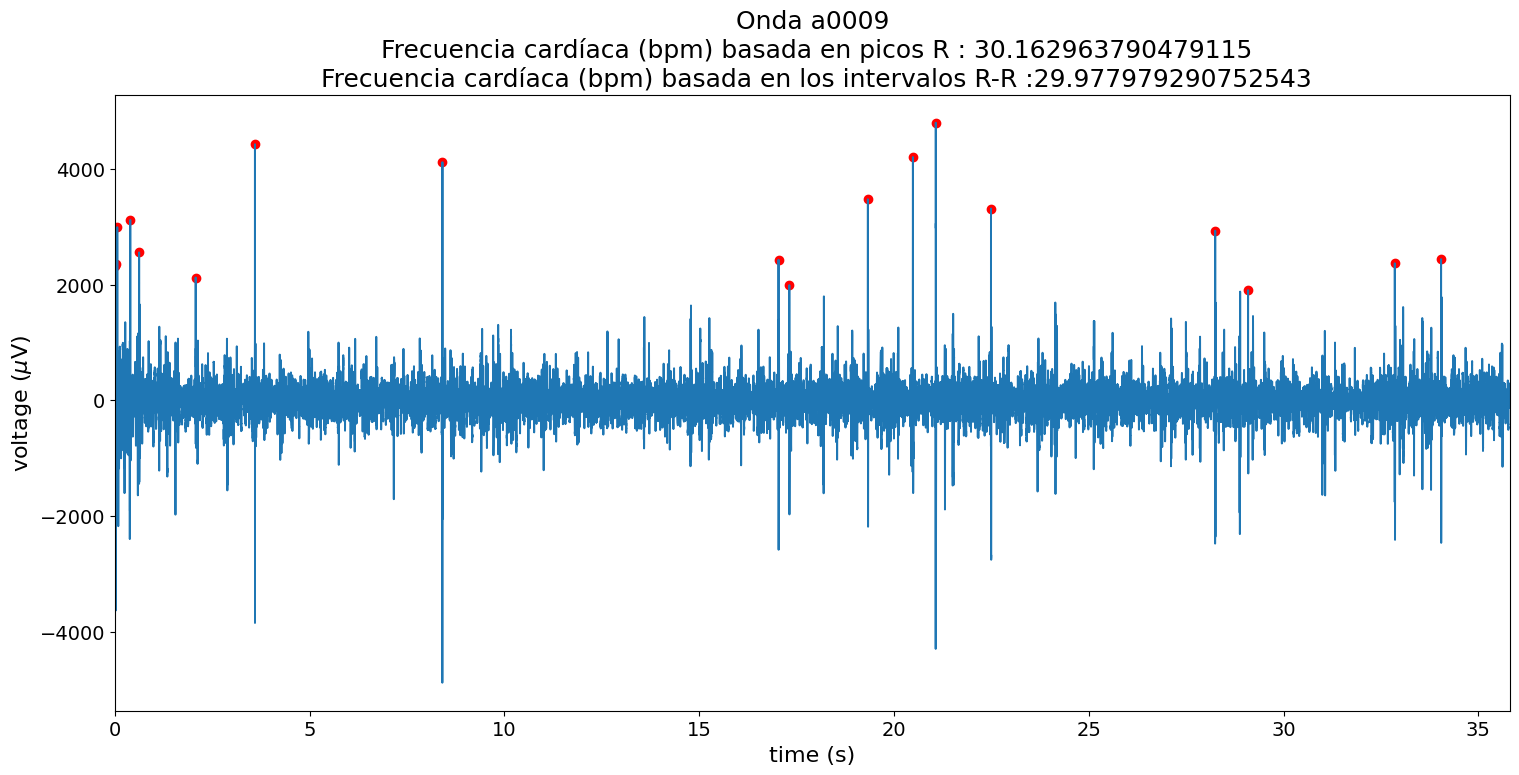

Onda a0009
 Frecuencia cardíaca (bpm) basada en picos R : 30.162963790479115
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :29.977979290752543


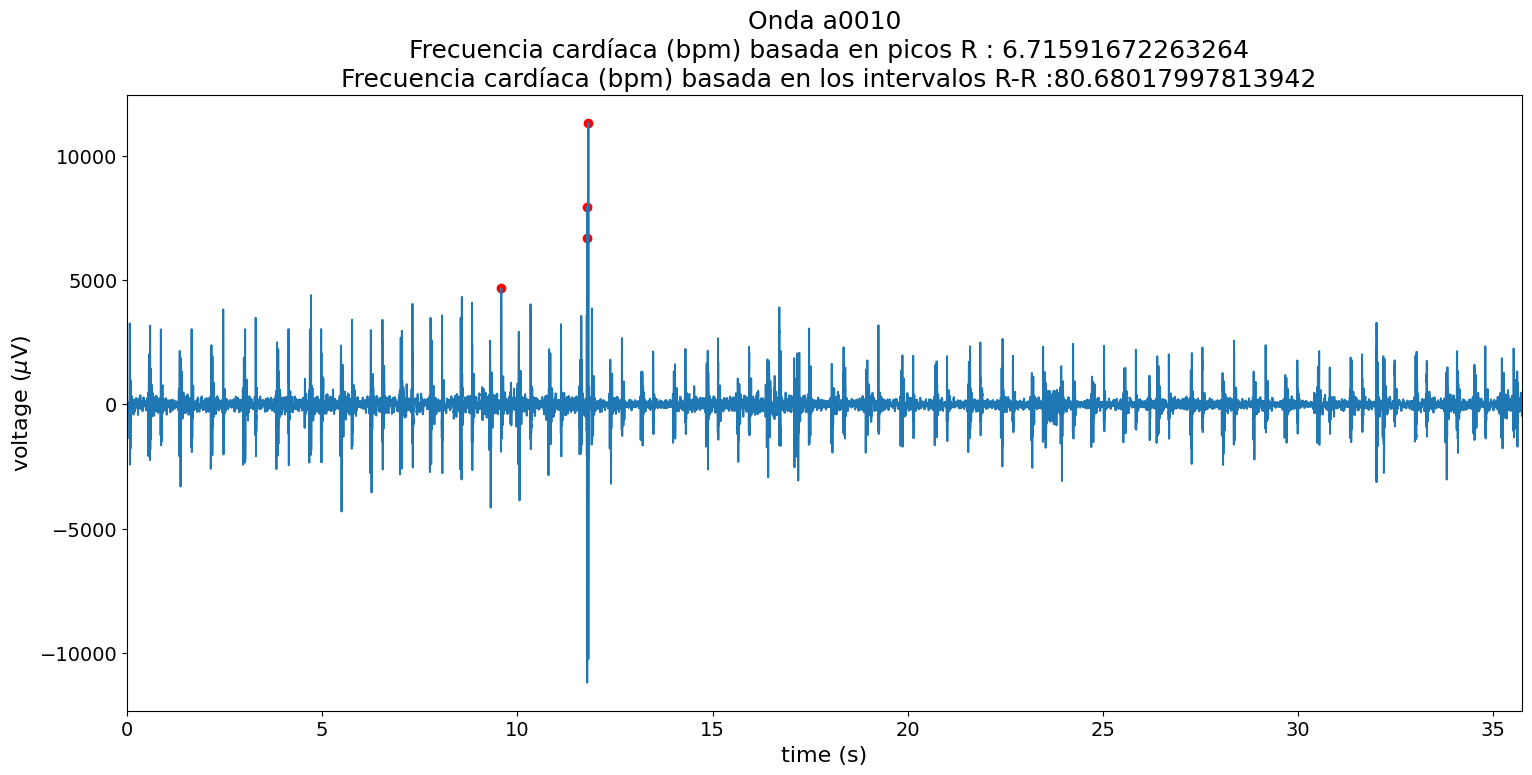

Onda a0010
 Frecuencia cardíaca (bpm) basada en picos R : 6.71591672263264
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :80.68017997813942


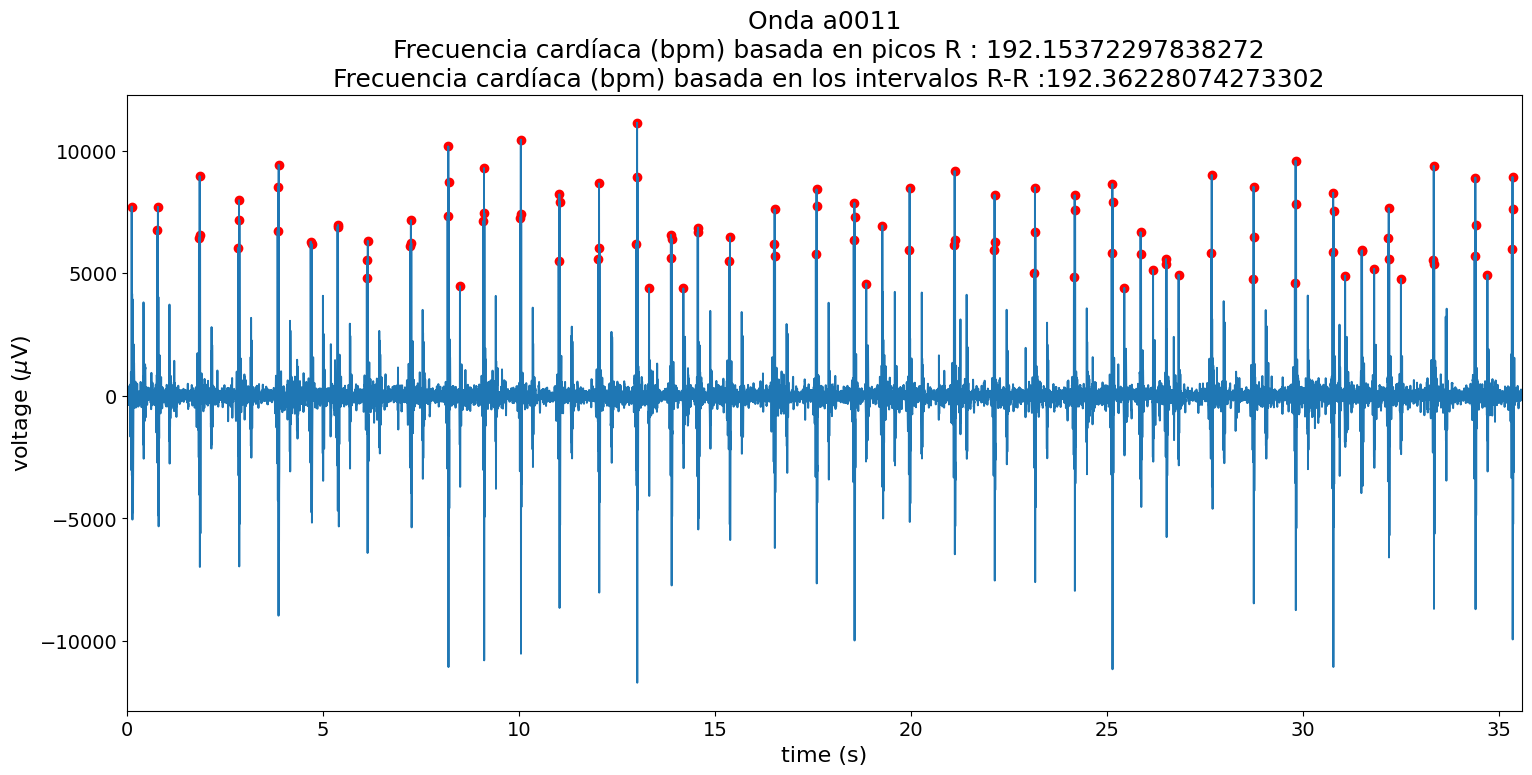

Onda a0011
 Frecuencia cardíaca (bpm) basada en picos R : 192.15372297838272
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :192.36228074273302


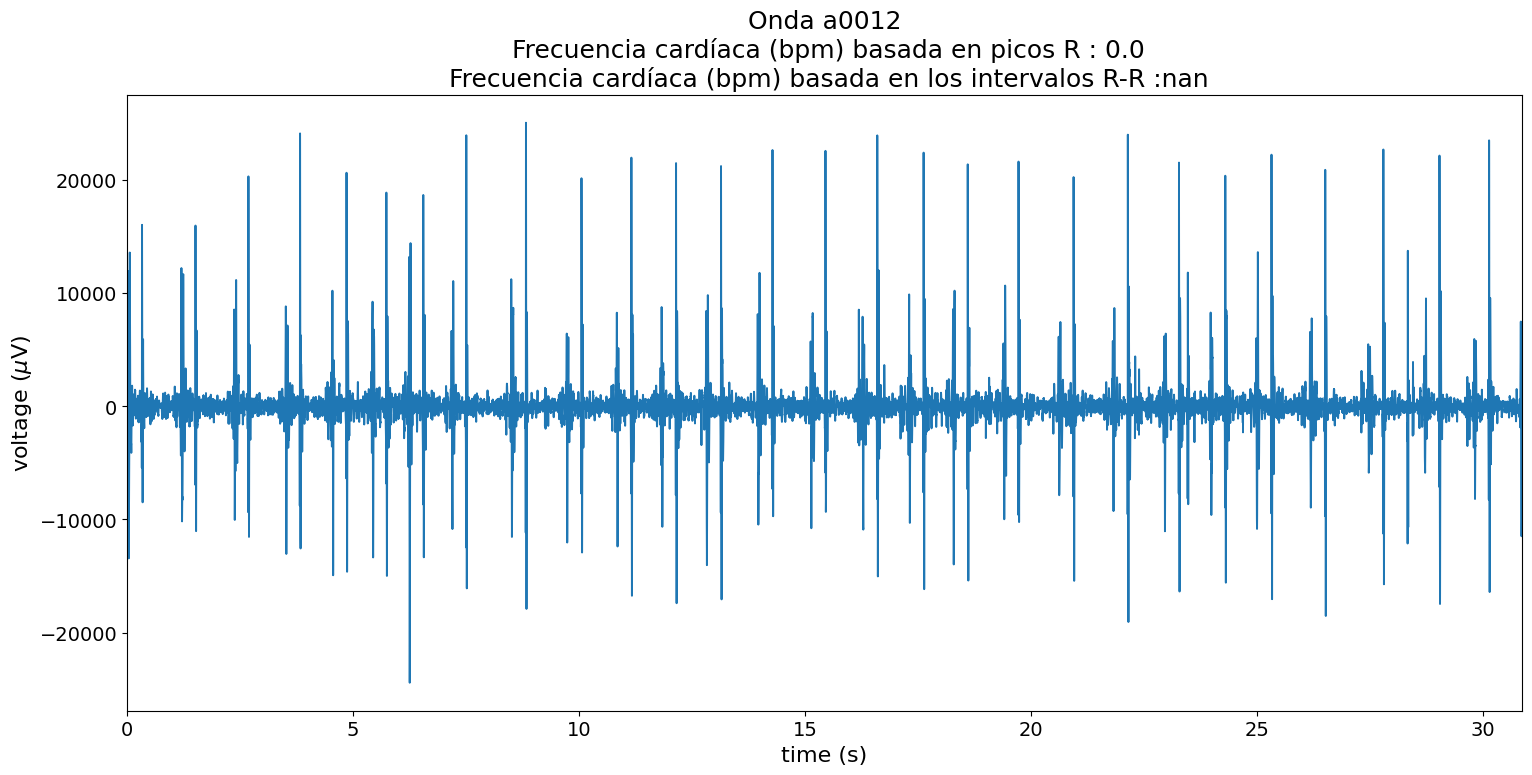

Onda a0012
 Frecuencia cardíaca (bpm) basada en picos R : 0.0
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :nan


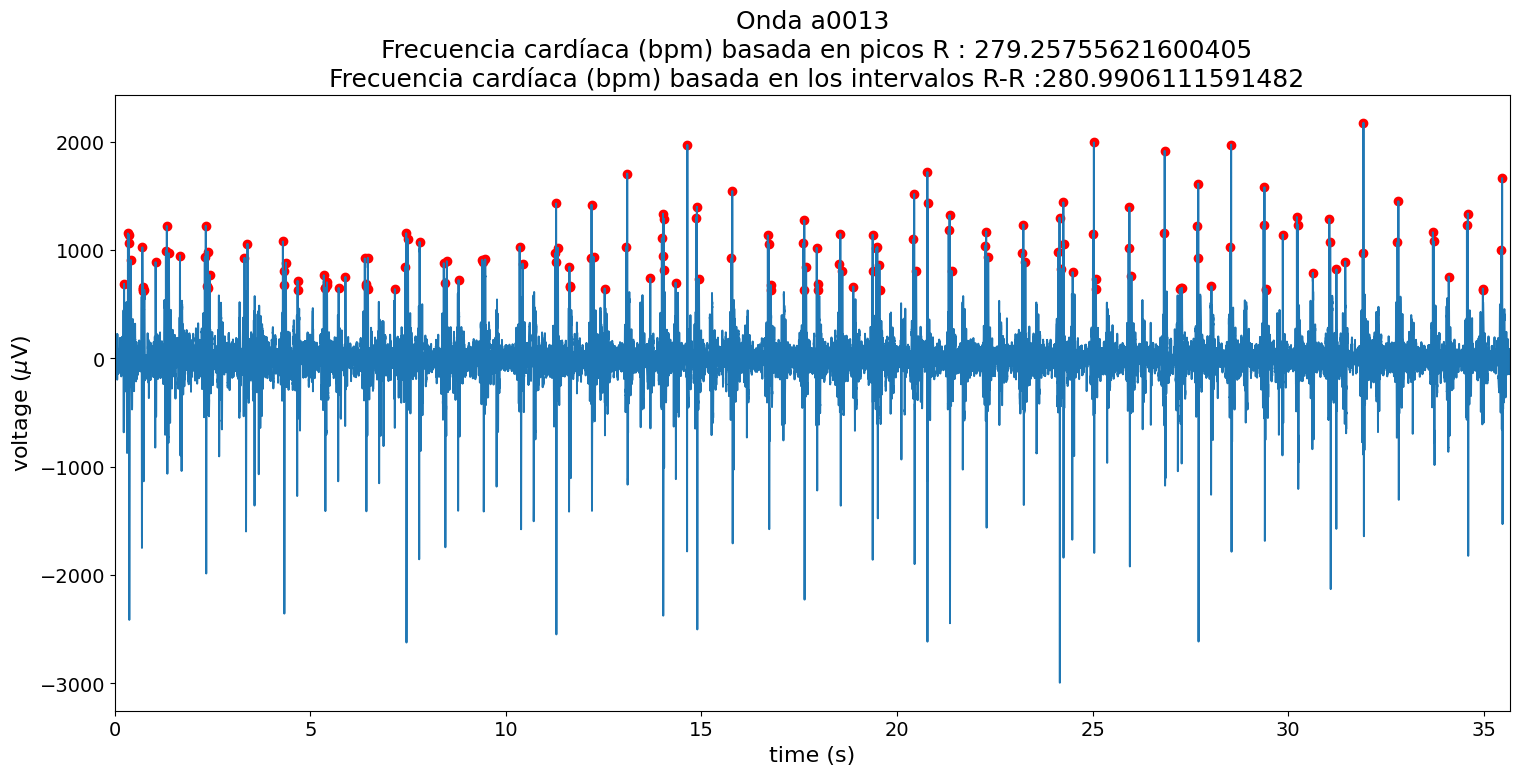

Onda a0013
 Frecuencia cardíaca (bpm) basada en picos R : 279.25755621600405
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :280.9906111591482


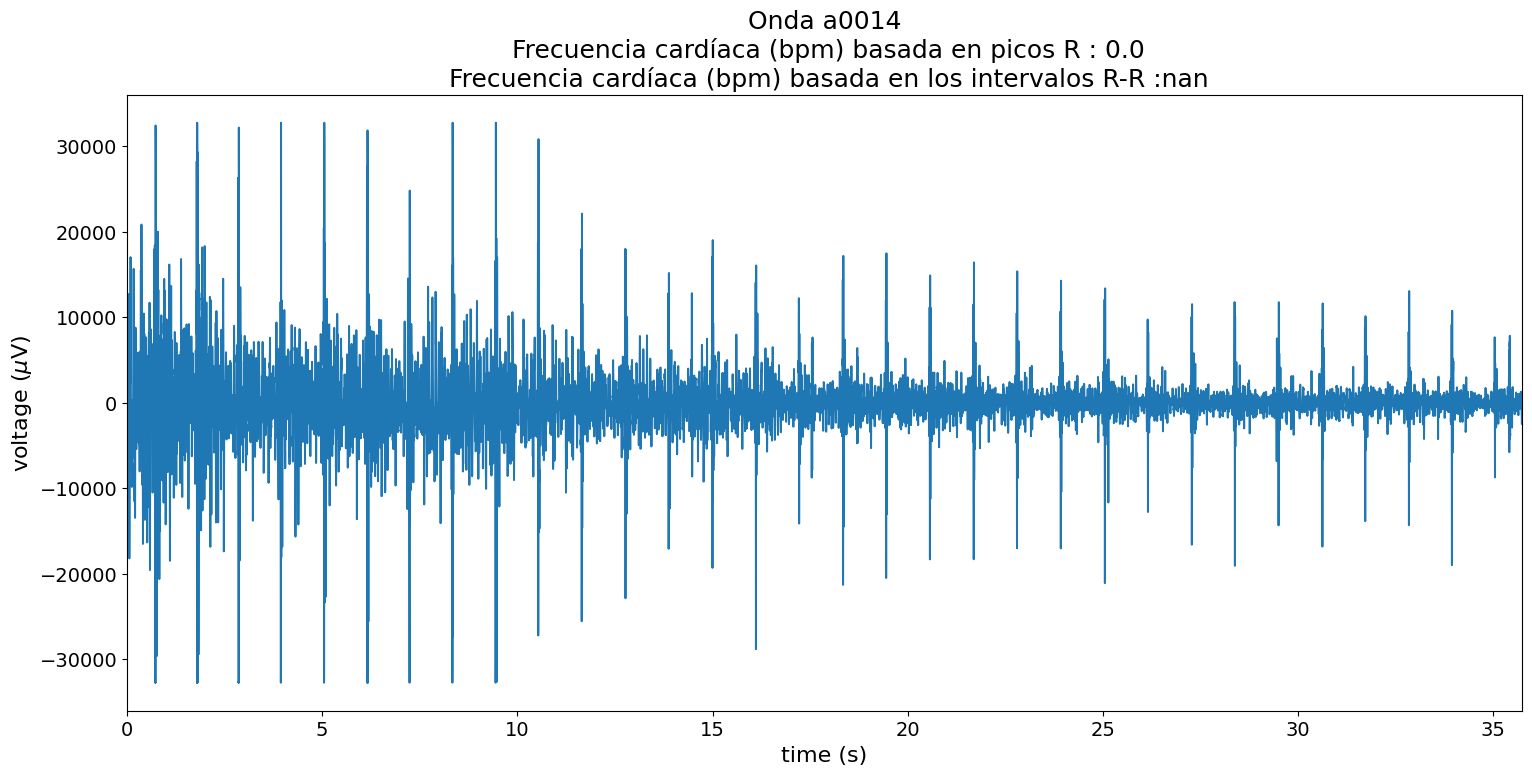

Onda a0014
 Frecuencia cardíaca (bpm) basada en picos R : 0.0
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :nan


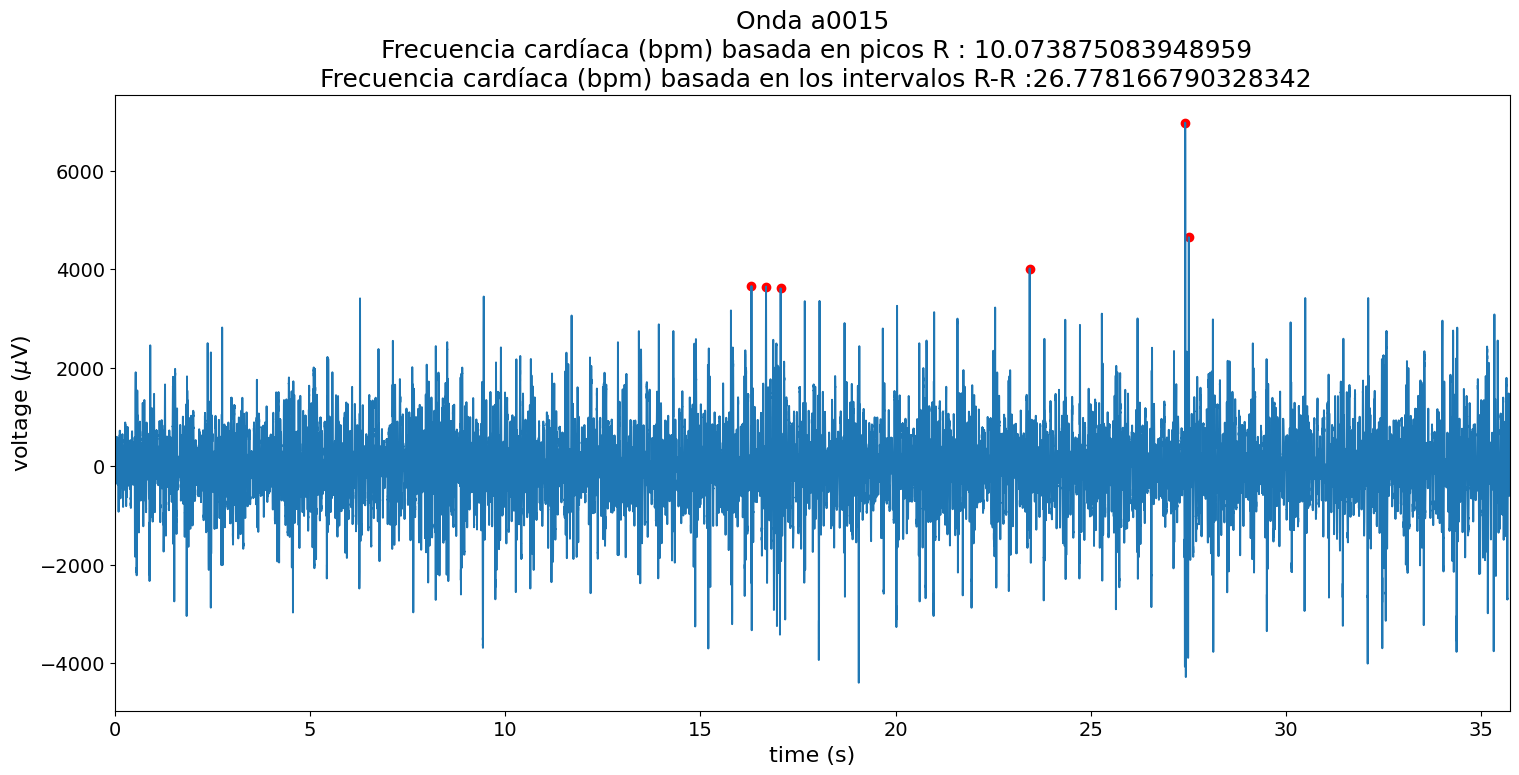

Onda a0015
 Frecuencia cardíaca (bpm) basada en picos R : 10.073875083948959
 Frecuencia cardíaca (bpm) basada en los intervalos R-R :26.778166790328342


In [18]:
for i in range(0, len(nice)): ###Se agrega un for para crear todos los graficos de cada señal
    timeECG, waveData = ecg(nice[i]+'.wav') ###Se crean las variables para cada señal
    #Probar la función y trazar.
    mxs_indices = detecta_maximos_locales(timeECG, waveData)

    mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
    xx = R_intervals(timeECG[mxs_indices])
    mean_rr = np.mean(xx)
    mean_bpm_from_rr = 60 / mean_rr ### Se agrega formula para calcular el valor de la frecuencia cardiaca a partir de los intervalos R-R
    
    
    plt.figure(figsize=(18,8))
    plt.xlabel('time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.xlim(min(timeECG),max(timeECG))
    plt.plot(timeECG, waveData)
    plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
    plt.title("Onda " + nice[i] + "\n Frecuencia cardíaca (bpm) basada en picos R : " + str(mean_bpm) + "\n Frecuencia cardíaca (bpm) basada en los intervalos R-R :" + str(mean_bpm_from_rr)) 
    ### Se agrega titulo a los graficos con dos diferentes frecuencias cardiacas, dadas por los dos diferentes metodos

    plt.show()

    ### Frecuencia cardíaca por los dos diferentes metodos, se imprime tambien en pantalla (ya se imprime dentro del grafico)
    
    print("Onda " + nice[i] + "\n Frecuencia cardíaca (bpm) basada en picos R : " + str(mean_bpm) + "\n Frecuencia cardíaca (bpm) basada en los intervalos R-R :" + str(mean_bpm_from_rr))

<div style="text-align: justify;">
<p>

# III. Conclusiones:

- Se puede extraer información de los diferentes archivos.wav y almacenarlos en distintas variables.
- Es posible generar gráficos a partir de la información extraída de los archivos.wav y generar gráficos a partir de ellos.
- También es posible modificar las distintas variables con el fin de graficar diferentes secciones en el tiempo de las ondas contenidas en los archivos.wav.

</p>
</div>

<div style="text-align: justify;">
<p>

# IV. Bibliografía

- García, J. (2016). *Errores y artefactos más comunes en la obtención del electrocardiograma*. SIACARDIO. Recuperado 9 de septiembre de 2023, de [https://www.siacardio.com/wp-content/uploads/2015/01/ECG-Capitulo-10-Errores-y-artefactos-comunes-en-ECG.pdf](https://www.siacardio.com/wp-content/uploads/2015/01/ECG-Capitulo-10-Errores-y-artefactos-comunes-en-ECG.pdf)

- Kachuee, M., Fazeli, S., & Sarrafzadeh, M. (2018). *ECG Heartbeat Classification: A Deep Transferable Representation*. 2018 IEEE International Conference on Healthcare Informatics (ICHI). [https://doi.org/10.1109/ichi.2018.00092](https://doi.org/10.1109/ichi.2018.00092)

- Pulido, A., & McKiernan, E. (2020). *Graphing and analyzing ECG data*. Gist. Recuperado 6 de septiembre de 2023, de [https://gist.github.com/emckiernan/3e7e86a48256777e9e6a44ede032d938#file-ecganalysis-ipynb](https://gist.github.com/emckiernan/3e7e86a48256777e9e6a44ede032d938#file-ecganalysis-ipynb)


</p>
</div>